In [6]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Leemos el dataset
data_lme = pd.read_csv("lme.csv", thousands=",", decimal=".")

data_lme.describe()

,Value
count,117.000000
mean,6601.940214
std,10060.106040
min,17.465000
25%,1055.000000
50%,1727.000000
75%,5879.500000
max,35500.000000


In [3]:
data_lme.head()

,Date,Product,Currency,Value
0,21 October 2019,LME Aluminium,US$,1735.5
1,21 October 2019,LME Copper,US$,5820.0
2,21 October 2019,LME Zinc,US$,2500.0
3,21 October 2019,LME Nickel,US$,16200.0
4,21 October 2019,LME Lead,US$,2202.0


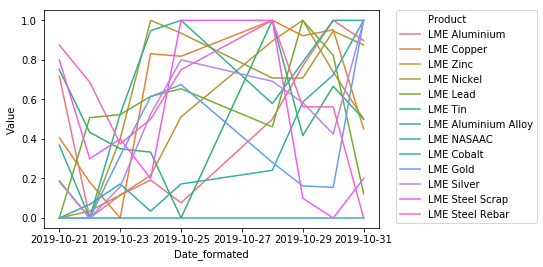

In [7]:
# Creamos una columna con la fecha en formato datatime
data_lme["Date_formated"]=pd.to_datetime(data_lme.Date)

# Normalizamos los precios para que tomen valores entre 0 y 1
# normalizacion = ( x – min(x) ) / ( max(x) – min(x) ) para cada metal

metales = data_lme.Product.unique()
x_scaled_completed =pd.DataFrame(columns = ["Value"])

for i in metales:
    scaler = MinMaxScaler()
    data_lme.loc[data_lme["Product"]==i, ["Value"]] = scaler.fit_transform(data_lme.loc[data_lme["Product"]==i, ["Value"]]) 
  
sns.lineplot(x="Date_formated", y="Value", hue="Product", data=data_lme)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
data_aluminium=data_lme[data_lme.Product=="LME Aluminium"]
sns.lineplot(x="Date_formated", y="Value", data=data_aluminium)

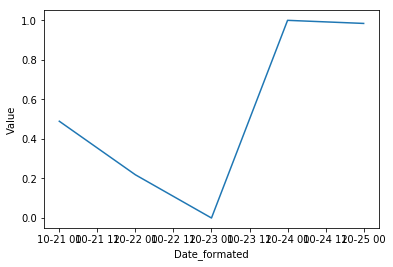

In [5]:
data_copper=data_lme[data_lme.Product=="LME Copper"]
sns.lineplot(x="Date_formated", y="Value", data=data_copper)

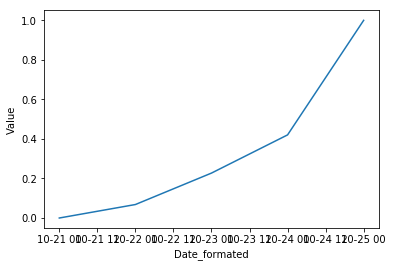

In [6]:
data_zinc=data_lme[data_lme.Product=="LME Zinc"]
sns.lineplot(x="Date_formated", y="Value", data=data_zinc)